In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.metrics import silhouette_score
from scipy import stats
from statistics import mean
from math import exp
import networkx as nx
from scipy.stats import rankdata
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Read Graph of Gml file

In [2]:
G0 = nx.read_gml('dolphins.gml')

Calculate centrality measures

In [3]:
degree_centrality = nx.degree_centrality(G0)
closeness_centrality = nx.closeness_centrality(G0)
betweenness_centrality = nx.betweenness_centrality(G0)

In [4]:
dic = {'Node_Id' :list(G0.nodes()) , 'Deg_Cent' : list(degree_centrality.values()) , 'Clo_Cent' : list(closeness_centrality.values()) , 'Bet_Cent' : list(betweenness_centrality.values())}
community_details = pd.DataFrame(dic)
community_details

,Node_Id,Deg_Cent,Clo_Cent,Bet_Cent
0,Beak,0.098361,0.346591,0.019083
1,Beescratch,0.131148,0.371951,0.213324
2,Bumper,0.065574,0.282407,0.009073
3,CCL,0.049180,0.308081,0.002374
4,Cross,0.016393,0.248980,0.000000
...,...,...,...,...
57,Web,0.147541,0.301980,0.084205
58,Whitetip,0.016393,0.248980,0.000000
59,Zap,0.081967,0.342697,0.020333
60,Zig,0.016393,0.178363,0.000000


In [6]:
k_data = {'Deg_Cent' : list(degree_centrality.values()) , 'Clo_Cent' : list(closeness_centrality.values()) , 'Bet_Cent' : list(betweenness_centrality.values())}
data = pd.DataFrame(k_data)
data

,Deg_Cent,Clo_Cent,Bet_Cent
0,0.098361,0.346591,0.019083
1,0.131148,0.371951,0.213324
2,0.065574,0.282407,0.009073
3,0.049180,0.308081,0.002374
4,0.016393,0.248980,0.000000
...,...,...,...
57,0.147541,0.301980,0.084205
58,0.016393,0.248980,0.000000
59,0.081967,0.342697,0.020333
60,0.016393,0.178363,0.000000


# **K-means**

Elbow method

In [8]:
#optimise number of clusters
def op_k(data, m_k):
    means = []
    inertias = []

    for k in range(1, m_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    # generate the elbow graph
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

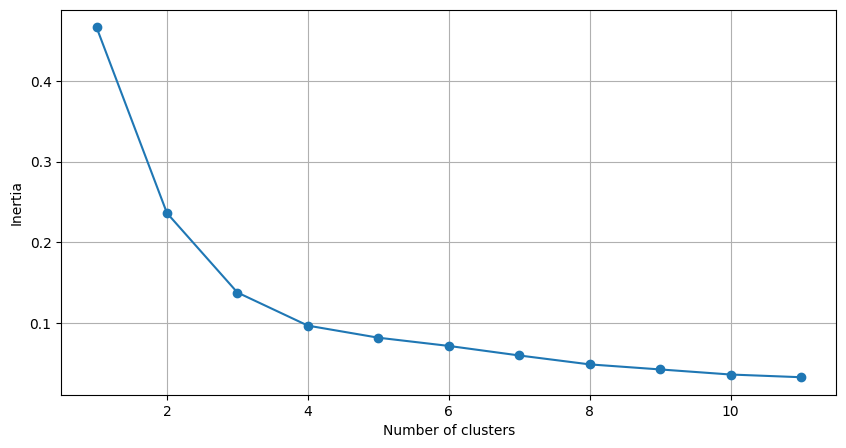

In [9]:
op_k(data,12)

Silouhette method

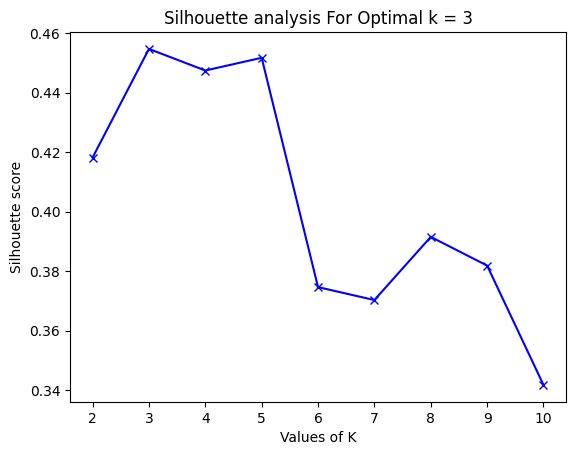

In [10]:
k_max = 10
silhouette_avg = []
for num_clusters in range(2, k_max+1):

 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data)
 cluster_labels = kmeans.labels_
 # silhouette score
 silhouette_avg.append(silhouette_score(data, cluster_labels))
 k_op = np.argmax(silhouette_avg) + 2

plt.plot(range(2,k_max+1),silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title(f'Silhouette analysis For Optimal k = {k_op}')
plt.show()

initialize random centroids

In [11]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [12]:
centroids = random_centroids(data, k_op)

Get labels for each data point : find the distance between the centroid and the data point

In [13]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [15]:
labels = get_labels(data, centroids)

Create new centroids

In [16]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

Plot the centroids

In [17]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    #turn 3 dimensional data to 2 dimentional data
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

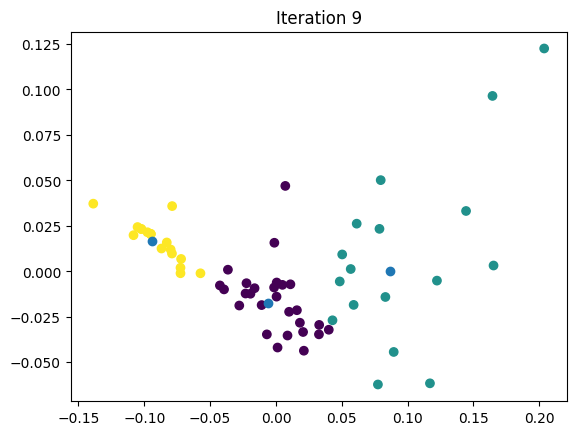

In [18]:
max_iterations = 100
centroid_count = k_op

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1